In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import math

In [2]:
titanic_dataset= pd.read_csv("https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/titanic_data.csv")

In [3]:
titanic_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_dataset.shape

(891, 12)

In [5]:
titanic_dataset.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
#1. What is the target variable?
 # Survived

# Analyze the dataset

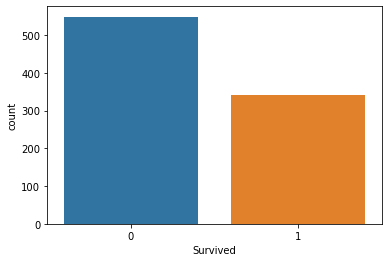

In [7]:
sns.countplot("Survived",data=titanic_dataset)

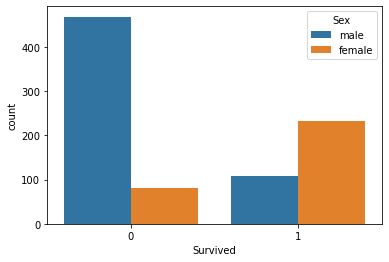

In [8]:
sns.countplot("Survived",hue="Sex",data=titanic_dataset)

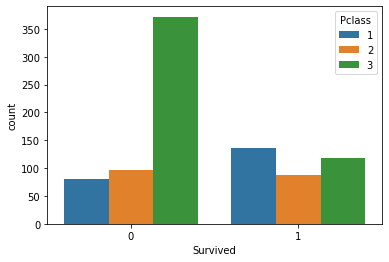

In [9]:
sns.countplot("Survived",hue="Pclass",data=titanic_dataset)

In [10]:
titanic_dataset.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

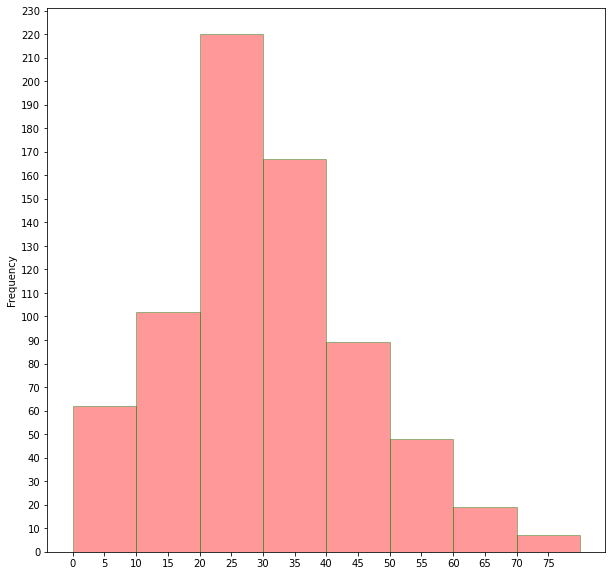

In [11]:
import matplotlib.pyplot as plt
plt.xticks(range(0,80,5))
plt.yticks(range(0,300,10))
titanic_dataset["Age"].plot.hist(bins=[0,10,20,30,40,50,60,70,80],figsize=(10,10),alpha=0.4,color="r",edgecolor="g")

## How many older people are there on titanic ?

In [12]:
len(titanic_dataset[(titanic_dataset["Age"] <70) & (titanic_dataset["Age"] >=60)]["Age"])

19

In [13]:
titanic_dataset.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## How many people are in thre age group of 25yrs and 45yrs?

In [14]:
len(titanic_dataset[(titanic_dataset["Age"] >=25) & (titanic_dataset["Age"] <=45)]["Age"])

333

## Age of children under 5 years?

In [15]:
age_under_5_bucket = [x for x in titanic_dataset.Age if x<=5 and x>=0]

In [16]:
len(age_under_5_bucket)

44

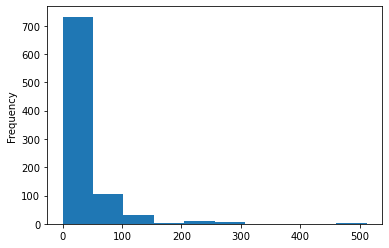

In [17]:
titanic_dataset["Fare"].plot.hist()

In [18]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


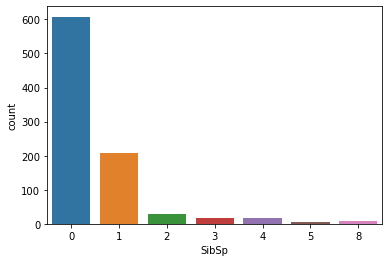

In [19]:
sns.countplot("SibSp",data=titanic_dataset)

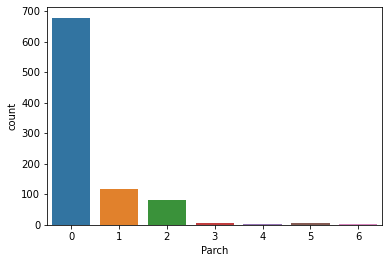

In [20]:
sns.countplot("Parch",data=titanic_dataset)

# Data wrangling

In [21]:
# is the cleaning required for this data?
# imputation

## what percentage of null values are present in each column

In [22]:
titanic_dataset.isnull().sum()   #isnull or isna

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
titanic_dataset.isna().sum()/titanic_dataset.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## Remove cabin column as it has a lot of missing values 77%

In [24]:
titanic_dataset.drop("Cabin",axis=1,inplace=True)

In [25]:
titanic_dataset["Age"].median()

28.0

In [26]:
titanic_dataset["Age"].mean()

29.69911764705882

In [27]:
titanic_dataset["Age"]=titanic_dataset["Age"].fillna(titanic_dataset["Age"].median())

In [28]:
titanic_dataset["Age"].isna().sum()

0

In [29]:
titanic_dataset["Embarked"].mode()

0    S
dtype: object

In [30]:
type(titanic_dataset["Embarked"].mode().values)

numpy.ndarray

In [31]:
type(titanic_dataset["Embarked"].mode())   #we cannot replace series with numners

pandas.core.series.Series

In [32]:
titanic_dataset["Embarked"].mode().values[0]

'S'

In [33]:
titanic_dataset["Embarked"]=titanic_dataset["Embarked"].fillna(titanic_dataset["Embarked"].mode().values[0])

In [34]:
titanic_dataset["Embarked"].isna().sum()

0

In [35]:
titanic_dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

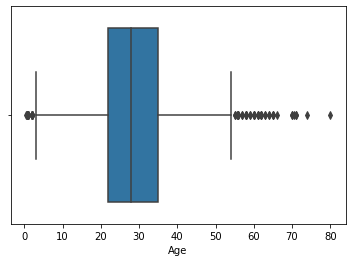

In [36]:
sns.boxplot(titanic_dataset["Age"],data=titanic_dataset)

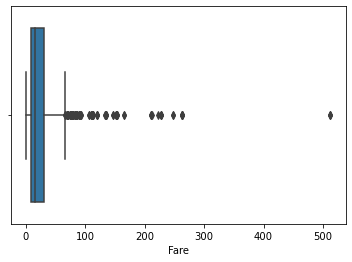

In [37]:
sns.boxplot(titanic_dataset["Fare"],data=titanic_dataset)

## Remove duplicates

In [38]:
titanic_dataset.duplicated().sum()

0

In [39]:
len(titanic_dataset["Ticket"].unique())

681

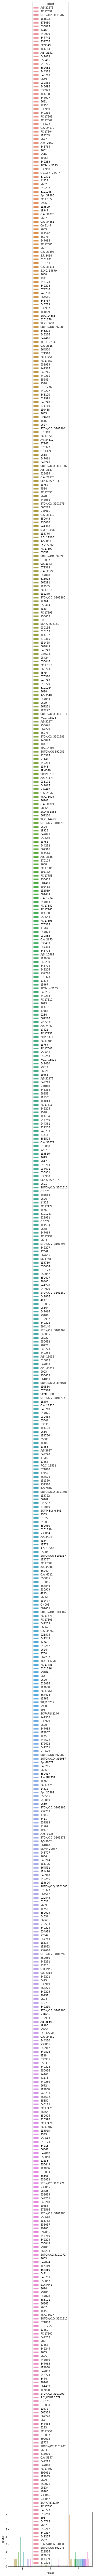

In [40]:
sns.countplot("Pclass",hue="Ticket",data=titanic_dataset)

In [41]:
sex= pd.get_dummies(titanic_dataset["Sex"],drop_first=False)
sex.head(10)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [42]:
embark = pd.get_dummies(titanic_dataset["Embarked"],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [43]:
pcl = pd.get_dummies(titanic_dataset["Pclass"])
pcl

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [44]:
parch = pd.get_dummies(titanic_dataset["Parch"])
parch.columns=["parch" + str(column) for column in parch.columns]
parch

,parch0,parch1,parch2,parch3,parch4,parch5,parch6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
886,1,0,0,0,0,0,0
887,1,0,0,0,0,0,0
888,0,0,1,0,0,0,0
889,1,0,0,0,0,0,0


In [45]:
#embark = pd.get_dummies(data=titanic_dataset["Embarked"],prefix='emb',prefix_sep='_')

In [46]:
titanic_dataset = pd.concat([titanic_dataset,sex,embark,pcl,parch],axis=1)

In [47]:
titanic_dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,1,2,3,parch0,parch1,parch2,parch3,parch4,parch5,parch6
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,1,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,1,0,0,0,0,0,0


In [48]:
titanic_dataset.drop(["PassengerId","Name","Sex","Pclass","Parch","Ticket","Embarked"],axis=1,inplace=True)

In [49]:
titanic_dataset.head()

,Survived,Age,SibSp,Fare,female,male,Q,S,1,2,3,parch0,parch1,parch2,parch3,parch4,parch5,parch6
0,0,22.0,1,7.2500,0,1,0,1,0,0,1,1,0,0,0,0,0,0
1,1,38.0,1,71.2833,1,0,0,0,1,0,0,1,0,0,0,0,0,0
2,1,26.0,0,7.9250,1,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,35.0,1,53.1000,1,0,0,1,1,0,0,1,0,0,0,0,0,0
4,0,35.0,0,8.0500,0,1,0,1,0,0,1,1,0,0,0,0,0,0


In [50]:
titanic_dataset.to_csv("cleaned_titanic.csv")

# Train Test Split

In [51]:
x =titanic_dataset.drop(["Survived"],axis=1)
y =titanic_dataset["Survived"]

In [52]:
from sklearn.model_selection import train_test_split

In [178]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =555)

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
model = LogisticRegression(max_iter=500)

In [181]:
x_train

,Age,SibSp,Fare,female,male,Q,S,1,2,3,parch0,parch1,parch2,parch3,parch4,parch5,parch6
738,28.0,0,7.8958,0,1,0,1,0,0,1,1,0,0,0,0,0,0
2,26.0,0,7.9250,1,0,0,1,0,0,1,1,0,0,0,0,0,0
635,28.0,0,13.0000,1,0,0,1,0,1,0,1,0,0,0,0,0,0
26,28.0,0,7.2250,0,1,0,0,0,0,1,1,0,0,0,0,0,0
293,24.0,0,8.8500,1,0,0,1,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,1.0,0,15.7417,1,0,0,0,0,0,1,0,0,1,0,0,0,0
580,25.0,1,30.0000,1,0,0,1,0,1,0,0,1,0,0,0,0,0
33,66.0,0,10.5000,0,1,0,1,0,1,0,1,0,0,0,0,0,0
686,14.0,4,39.6875,0,1,0,1,0,0,1,0,1,0,0,0,0,0


In [182]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [183]:
prediction= model.predict(x_test)

In [184]:
from sklearn.metrics import classification_report

In [185]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       175
           1       0.82      0.76      0.79        93

    accuracy                           0.86       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.86      0.86      0.86       268



In [186]:
y_test.value_counts()

0    175
1     93
Name: Survived, dtype: int64

In [187]:
from collections import Counter
Counter(prediction)

Counter({1: 87, 0: 181})

In [188]:
from sklearn.metrics import confusion_matrix

In [189]:
confusion_matrix(y_test,prediction)

array([[159,  16],
       [ 22,  71]], dtype=int64)

In [190]:
ref_df=pd.DataFrame({"y_test": y_test, "prediction":prediction})

In [191]:
ref_df.columns

Index(['y_test', 'prediction'], dtype='object')

In [192]:
ref_df.loc[(ref_df['y_test']==1) & (ref_df['prediction']==1)]

,y_test,prediction
875,1,1
399,1,1
318,1,1
3,1,1
82,1,1
...,...,...
809,1,1
432,1,1
871,1,1
615,1,1


In [193]:
from sklearn.metrics import accuracy_score

In [194]:
accuracy_score(y_test,prediction)

0.8582089552238806

In [195]:
# with standard scalar there is some boost in accuracy

## Initialize Standard Scalar

In [196]:
x_train

,Age,SibSp,Fare,female,male,Q,S,1,2,3,parch0,parch1,parch2,parch3,parch4,parch5,parch6
738,28.0,0,7.8958,0,1,0,1,0,0,1,1,0,0,0,0,0,0
2,26.0,0,7.9250,1,0,0,1,0,0,1,1,0,0,0,0,0,0
635,28.0,0,13.0000,1,0,0,1,0,1,0,1,0,0,0,0,0,0
26,28.0,0,7.2250,0,1,0,0,0,0,1,1,0,0,0,0,0,0
293,24.0,0,8.8500,1,0,0,1,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,1.0,0,15.7417,1,0,0,0,0,0,1,0,0,1,0,0,0,0
580,25.0,1,30.0000,1,0,0,1,0,1,0,0,1,0,0,0,0,0
33,66.0,0,10.5000,0,1,0,1,0,1,0,1,0,0,0,0,0,0
686,14.0,4,39.6875,0,1,0,1,0,0,1,0,1,0,0,0,0,0


In [197]:
x_test

,Age,SibSp,Fare,female,male,Q,S,1,2,3,parch0,parch1,parch2,parch3,parch4,parch5,parch6
875,15.0,0,7.2250,1,0,0,0,0,0,1,1,0,0,0,0,0,0
594,37.0,1,26.0000,0,1,0,1,0,1,0,1,0,0,0,0,0,0
132,47.0,1,14.5000,1,0,0,1,0,0,1,1,0,0,0,0,0,0
232,59.0,0,13.5000,0,1,0,1,0,1,0,1,0,0,0,0,0,0
505,18.0,1,108.9000,0,1,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,16.0,0,26.0000,0,1,0,1,0,1,0,1,0,0,0,0,0,0
871,47.0,1,52.5542,1,0,0,1,1,0,0,0,1,0,0,0,0,0
615,24.0,1,65.0000,1,0,0,1,0,1,0,0,0,1,0,0,0,0
366,60.0,1,75.2500,1,0,0,0,1,0,0,1,0,0,0,0,0,0


In [198]:
x_train_std

array([[ 1.85006945, -0.49352622,  1.09493162, ..., -0.06956083,
        -0.08038679,  0.        ],
       [-0.55828811, -0.49352622, -0.56613785, ..., -0.06956083,
        -0.08038679,  0.        ],
       [ 0.34484597, -0.49352622, -0.44072905, ..., -0.06956083,
        -0.08038679,  0.        ],
       ...,
       [ 0.42010715, -0.49352622, -0.12332534, ..., -0.06956083,
        -0.08038679,  0.        ],
       [ 0.19432363,  0.45838349, -0.37264998, ..., -0.06956083,
        -0.08038679,  0.        ],
       [ 0.11906245, -0.49352622,  0.4549478 , ..., -0.06956083,
        -0.08038679,  0.        ]])

In [199]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_train_std= scalar.fit_transform(x_train)

In [200]:
model.fit(x_train_std,y_train)

LogisticRegression(max_iter=500)

In [201]:
x_test_std = scalar.transform(x_test)

In [202]:
prediction= model.predict(x_test)
accuracy_score(y_test,prediction)

0.6828358208955224

In [76]:
dir(model)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'w

In [77]:
model.predict_proba(x_test)

array([[9.99994833e-01, 5.16676110e-06],
       [9.97022931e-01, 2.97706939e-03],
       [1.59583458e-06, 9.99998404e-01],
       [9.99999503e-01, 4.96861225e-07],
       [9.99998465e-01, 1.53510736e-06],
       [9.99317711e-01, 6.82288571e-04],
       [9.99908155e-01, 9.18451287e-05],
       [9.99999895e-01, 1.05400915e-07],
       [9.99999999e-01, 1.29863682e-09],
       [9.99999999e-01, 1.21833452e-09],
       [9.99998174e-01, 1.82620708e-06],
       [9.99999615e-01, 3.85387799e-07],
       [9.99991716e-01, 8.28448061e-06],
       [1.00000000e+00, 8.47213336e-11],
       [9.99985297e-01, 1.47032249e-05],
       [1.00000000e+00, 7.37614007e-17],
       [9.99936010e-01, 6.39901592e-05],
       [9.67932105e-01, 3.20678945e-02],
       [9.99829946e-01, 1.70053929e-04],
       [9.99972680e-01, 2.73203639e-05],
       [9.99982111e-01, 1.78885317e-05],
       [9.99987784e-01, 1.22155174e-05],
       [9.99999879e-01, 1.20626483e-07],
       [1.00000000e+00, 3.04409137e-10],
       [9.971864

In [78]:
model.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [84]:
import sklearn


In [85]:
sklearn.__version__

'0.23.1'